In [2]:
import pandas as pd 
import numpy as np
import os 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 

In [3]:
csv_dir = "csv"
csv_filelist = os.listdir(csv_dir)
dataset_handles = [re.search("(.*)\.csv",fname).groups()[0] for fname in csv_filelist if re.search("(.*)\.csv",fname)]

In [4]:

plasma_AC_df = pd.read_csv("{0}/plasma_AC.csv".format(csv_dir),header=3)
tissue_amine_df = pd.read_csv("{0}/tissue_amine.csv".format(csv_dir),header=3)
tissue_AC_df = pd.read_csv("{0}/tissue_AC.csv".format(csv_dir),header=3)

tissue_amine_df.dropna(how="all",inplace=True)
tissue_amine_df.dropna(how="all",axis=1,inplace=True)
plasma_AC_df.dropna(how="all",inplace=True)

tissue_amine_df.rename(columns=lambda x: x.strip(),inplace=True)
tissue_AC_df.rename(columns=lambda x: x.strip(),inplace=True)
plasma_AC_df.rename(columns=lambda x: x.strip(),inplace=True)


#AC and amine columns 
amine_columns = tissue_amine_df.columns[4:]
AC_columns = tissue_AC_df.columns[4:]
plasma_AC_columns = plasma_AC_df.columns[7:]

#Convert to nM for consistency with HWDC original experiment data 
tissue_AC_df.loc[:,AC_columns] = tissue_AC_df.loc[:,AC_columns]*1000
tissue_amine_df.loc[:,amine_columns] = tissue_amine_df.loc[:,amine_columns]
plasma_AC_df.loc[:,plasma_AC_columns] = plasma_AC_df.loc[:,plasma_AC_columns]*1000

with pd.option_context('display.max_rows',None):
    display(plasma_AC_df)
    display(tissue_amine_df)
    display(tissue_AC_df)

,SampleID,Sex,Iso,Mouse Number,Tissue,Tube Color,Number complete 25 uL aliquots,C2,C3,C4/Ci4,...,C18:1,C18,C18:2-OH/C16:2-DC,C18:1-OH/C16:1-DC,C18-OH/C16-DC,C20:4,C20,C20:1-OH/C18:1-DC,C20-OH/C18-DC/C22:6,C22
0,MG01_AM1,M,A,1.0,Plasma,Blue,4.0,14961.248,265.298,444.848,...,296.808,109.914,15.732,15.942,14.683,48.874,7.132,7.761,3.776,3.566
1,MG01_AM2,M,A,2.0,Plasma,Blue,4.0,21250.387,279.587,458.724,...,257.584,97.957,10.698,11.327,10.907,43.630,4.195,6.922,5.244,5.454
2,MG01_AM3,M,A,3.0,Plasma,Blue,4.0,15944.169,225.428,289.726,...,253.179,75.513,10.068,11.537,11.746,37.337,4.824,6.293,1.888,4.824
3,MG01_AM4,M,A,4.0,Plasma,Blue,4.0,35993.640,176.365,390.332,...,372.741,91.035,14.264,16.361,11.537,56.215,6.922,6.293,3.566,4.615
4,MG01_AM5,M,A,5.0,Plasma,Blue,3.0,21966.498,198.149,247.898,...,315.896,94.391,13.634,14.473,14.683,32.303,5.873,6.922,0.000,4.195
5,MG01_AM6,M,A,6.0,Plasma,Blue,4.0,29807.120,241.616,317.479,...,359.736,79.499,16.990,22.654,11.956,47.825,0.000,9.020,1.678,5.873
6,MG01_AM7,M,A,7.0,Plasma,Blue,4.0,11792.273,238.318,239.472,...,256.325,87.679,9.229,15.312,13.844,31.254,5.873,6.503,3.356,5.873
7,MG01_AM8,M,A,8.0,Plasma,Blue,3.0,34161.480,172.069,325.409,...,494.191,110.543,24.332,32.932,10.907,31.044,4.405,4.405,0.000,3.985
8,MG01_AF1,F,A,9.0,Plasma,Purple,3.0,30462.216,403.892,498.868,...,353.234,97.538,15.312,17.829,11.117,50.342,7.132,9.439,0.000,3.985
9,MG01_AF2,F,A,10.0,Plasma,Purple,3.0,22792.995,268.195,320.255,...,243.530,78.659,11.956,12.376,6.083,45.937,5.663,7.551,2.937,3.776


,Number,Tissue,SampleID,Solvent,Sarcosine,Alanine,Aminoadipic Acid,Gamma-Amino-N-Butyric Acid,Beta-Amino-Isobutyric Acid,Alpha-Amino-N-Butyric Acid,...,1-Methylhistidine,Ornithine,Phenylalanine,Phosphoethanolamine,Proline,Serine,Taurine,Tryptophan,Tyrosine,Valine
0,1.0,Gastroc,MG01_AM1,50% acetonitrile and 0.3 formic acid in water,2.082,241.658,0.594,0.380,0.013,1.971,...,0.596,5.430,7.926,2.906,25.128,85.067,573.633,1.236,11.289,16.238
1,2.0,Gastroc,MG01_AM2,50% acetonitrile and 0.3 formic acid in water,2.072,167.917,0.413,0.397,0.018,0.711,...,0.606,7.295,6.681,2.513,21.197,56.513,580.413,0.988,12.018,13.591
2,3.0,Gastroc,MG01_AM3,50% acetonitrile and 0.3 formic acid in water,0.803,179.353,0.368,0.279,0.008,1.107,...,0.548,5.559,7.257,2.904,22.690,52.280,714.065,1.064,10.685,13.336
3,4.0,Gastroc,MG01_AM4,50% acetonitrile and 0.3 formic acid in water,1.334,163.493,0.532,0.428,0.014,2.055,...,0.572,5.027,8.062,1.340,22.818,46.503,631.660,1.151,9.556,16.487
4,5.0,Gastroc,MG01_AM5,50% acetonitrile and 0.3 formic acid in water,0.855,182.654,0.533,0.425,0.021,3.280,...,0.502,5.606,7.565,2.126,23.302,70.667,339.140,1.338,9.154,16.062
5,6.0,Gastroc,MG01_AM6,50% acetonitrile and 0.3 formic acid in water,1.092,144.491,0.428,0.660,0.018,1.830,...,0.475,5.936,7.129,2.741,19.229,58.726,494.649,1.597,8.580,16.436
6,7.0,Gastroc,MG01_AM7,50% acetonitrile and 0.3 formic acid in water,1.378,189.112,0.708,0.383,0.032,1.652,...,0.656,4.921,7.921,3.738,23.678,49.274,490.453,1.689,9.144,15.972
7,8.0,Gastroc,MG01_AM8,50% acetonitrile and 0.3 formic acid in water,0.593,144.682,0.508,0.291,0.012,2.001,...,0.665,3.592,5.787,4.947,16.881,45.357,537.622,1.038,6.274,12.675
8,9.0,Gastroc,MG01_AF1,50% acetonitrile and 0.3 formic acid in water,0.527,134.343,0.322,0.239,0.014,1.102,...,0.417,5.885,6.165,2.542,13.984,42.531,678.227,1.065,9.635,12.261
9,10.0,Gastroc,MG01_AF2,50% acetonitrile and 0.3 formic acid in water,0.826,199.379,0.500,0.284,0.020,1.893,...,0.514,5.980,7.912,2.249,23.433,78.757,432.548,1.001,11.916,15.120


,Number,Tissue,SampleID,Solvent,C2,C3,C4/Ci4,C5:1,C5,C4-OH,...,C20:3-OH/C18:3-DC,C20:2-OH/C18:2-DC,C20:1-OH/C18:1-DC,C20-OH/C18-DC/C22:6,C22:5,C22:4,C22:3,C22:2,C22:1,C22
0,1,Gastroc,MG01_AM1,50% acetonitrile and 0.3 formic acid in water,8463.750,105.927,238.969,37.179,60.162,204.688,...,0.000,5.840,1.514,2.596,3.893,2.163,0.000,0.000,1.082,1.514
1,2,Gastroc,MG01_AM2,50% acetonitrile and 0.3 formic acid in water,7881.135,68.781,201.185,29.338,23.659,183.597,...,1.514,3.893,2.163,1.514,0.000,0.000,0.000,0.000,0.000,0.000
2,3,Gastroc,MG01_AM3,50% acetonitrile and 0.3 formic acid in water,9093.019,136.847,220.127,40.694,25.011,230.240,...,0.000,5.408,5.191,1.298,0.000,1.947,0.000,0.000,0.000,1.730
3,4,Gastroc,MG01_AM4,50% acetonitrile and 0.3 formic acid in water,9192.435,117.662,297.690,33.799,32.718,241.461,...,1.082,4.326,3.677,1.730,1.082,2.379,0.000,2.163,3.677,0.000
4,5,Gastroc,MG01_AM5,50% acetonitrile and 0.3 formic acid in water,7743.951,117.764,218.133,38.125,22.443,249.167,...,0.000,2.163,2.812,1.298,0.000,2.379,1.298,1.730,1.730,0.000
5,6,Gastroc,MG01_AM6,50% acetonitrile and 0.3 formic acid in water,8714.791,118.989,238.969,45.696,23.930,236.459,...,0.000,4.975,3.245,0.000,0.000,2.379,1.082,0.000,1.082,0.000
6,7,Gastroc,MG01_AM7,50% acetonitrile and 0.3 formic acid in water,7231.871,100.824,270.872,33.123,90.041,156.422,...,0.000,4.975,2.163,1.947,0.000,0.865,0.000,0.000,1.947,0.000
7,8,Gastroc,MG01_AM8,50% acetonitrile and 0.3 formic acid in water,9995.545,138.174,388.313,39.613,36.773,371.655,...,0.000,6.056,4.110,2.596,0.000,2.596,0.000,0.000,3.245,2.163
8,9,Gastroc,MG01_AF1,50% acetonitrile and 0.3 formic acid in water,8329.343,113.989,231.891,26.634,38.396,221.722,...,0.000,3.245,3.028,2.163,0.000,1.947,0.000,0.000,0.000,2.379
9,10,Gastroc,MG01_AF2,50% acetonitrile and 0.3 formic acid in water,8177.163,112.458,171.675,25.823,25.687,176.161,...,2.596,4.542,3.028,0.000,0.000,0.000,0.000,0.000,2.163,1.082


In [5]:


AC_tissues = tissue_AC_df["Tissue"].unique()
amine_tissues = tissue_amine_df["Tissue"].unique()

tissue_amine_pvals = pd.DataFrame(index=amine_columns,columns=amine_tissues)
tissue_amine_A_mean = pd.DataFrame(index=amine_columns,columns=amine_tissues)
tissue_amine_B_mean = pd.DataFrame(index=amine_columns,columns=amine_tissues)

tissue_AC_pvals = pd.DataFrame(index=AC_columns,columns=AC_tissues)
tissue_AC_A_mean = pd.DataFrame(index=AC_columns,columns=AC_tissues)
tissue_AC_B_mean = pd.DataFrame(index=AC_columns,columns=AC_tissues)

In [6]:
def sig_str(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    else:
        return ""

In [7]:
import scipy.stats as sp_stats
STATS_TEST = "Mann-Whitney"

for tissue in AC_tissues: 
    #AC processing for pvals, A and B means 
    tissue_AC_subdf = tissue_AC_df.loc[tissue_AC_df["Tissue"]==tissue]
    tissue_AC_A = tissue_AC_subdf.loc[tissue_AC_subdf["SampleID"].str.contains(r'AM|AF'),AC_columns]
    tissue_AC_B = tissue_AC_subdf.loc[tissue_AC_subdf["SampleID"].str.contains(r'BM|BF'),AC_columns]
    assert(len(tissue_AC_A) + len(tissue_AC_B == len(tissue_AC_subdf)))
    if tissue != "colon":
        assert len(tissue_AC_A == 18)
        assert(len(tissue_AC_B) == 19)
    AC_A_means = tissue_AC_A.mean()
    AC_B_means = tissue_AC_B.mean()
        
    if STATS_TEST == "Mann-Whitney":
        AC_stat, AC_p = sp_stats.mannwhitneyu(x=tissue_AC_A,y=tissue_AC_B,alternative="two-sided")

    tissue_AC_pvals.loc[AC_columns,tissue] = AC_p
    tissue_AC_A_mean.loc[AC_columns,tissue] = AC_A_means
    tissue_AC_B_mean.loc[AC_columns,tissue] = AC_B_means
    
for tissue in amine_tissues: 
    tissue_amine_subdf = tissue_amine_df.loc[tissue_amine_df["Tissue"]==tissue]
    tissue_amine_A = tissue_amine_subdf.loc[tissue_amine_subdf["SampleID"].str.contains(r'AM|AF'),amine_columns]
    tissue_amine_B = tissue_amine_subdf.loc[tissue_amine_subdf["SampleID"].str.contains(r'BM|BF'),amine_columns]
    amine_A_means = tissue_amine_A.mean()
    amine_B_means = tissue_amine_B.mean()
    
    if STATS_TEST == "Mann-Whitney":
        amine_stat, amine_p = sp_stats.mannwhitneyu(x=tissue_amine_A,y=tissue_amine_B,alternative="two-sided")
    
    tissue_amine_pvals.loc[amine_columns,tissue] = amine_p
    tissue_amine_A_mean.loc[amine_columns,tissue] = amine_A_means
    tissue_amine_B_mean.loc[amine_columns,tissue] = amine_B_means
    
#Plasma AC processing 
plasma_AC_A = plasma_AC_df.loc[plasma_AC_df["SampleID"].str.contains(r'AM|AF'),plasma_AC_columns]
plasma_AC_B = plasma_AC_df.loc[plasma_AC_df["SampleID"].str.contains(r'BM|BF'),plasma_AC_columns]

plasma_AC_A_means = plasma_AC_A.mean()
plasma_AC_B_means = plasma_AC_B.mean()
if STATS_TEST == "Mann-Whitney":
    plasma_AC_stat, plasma_AC_p = sp_stats.mannwhitneyu(x=plasma_AC_A,y=plasma_AC_B,alternative="two-sided")

tissue_AC_pvals.loc[plasma_AC_columns,"Plasma"] = plasma_AC_p
tissue_AC_A_mean.loc[plasma_AC_columns,"Plasma"] = plasma_AC_A_means
tissue_AC_B_mean.loc[plasma_AC_columns,"Plasma"] = plasma_AC_B_means

In [8]:
PSEUDOCOUNT = 0.1
tissue_AC_ss = tissue_AC_pvals.applymap(sig_str)
tissue_AC_ratio = (tissue_AC_A_mean+PSEUDOCOUNT)/(tissue_AC_B_mean+PSEUDOCOUNT)
log_tissue_AC_ratio = tissue_AC_ratio.applymap(np.log2)


tissue_amine_ss = tissue_amine_pvals.applymap(sig_str)
tissue_amine_ratio = (tissue_amine_A_mean+PSEUDOCOUNT)/(tissue_amine_B_mean+PSEUDOCOUNT)
log_tissue_amine_ratio = tissue_amine_ratio.applymap(np.log2)

with pd.option_context('display.max_rows',None):
    display(tissue_AC_pvals)
    display(tissue_AC_ss)
#     display(log_tissue_AC_ratio)
    display(tissue_AC_ratio)
    
    display(tissue_amine_pvals)
    display(tissue_amine_ss)
#     display(log_tissue_amine_ratio)
    display(tissue_amine_ratio)

,Gastroc,Quadriceps,Heart,Liver,Jejunum,Colon,Plasma
C2,0.00002,0.000356,0.001661,0.207289,0.000005,0.202358,0.420674
C3,0.616102,0.166787,0.48459,0.148915,0.00001,0.476504,0.533330
C4/Ci4,0.338445,0.016364,0.018524,0.475171,0.01166,0.000003,0.267378
C5:1,0.616018,0.927344,0.465722,0.939445,0.616102,0.380214,0.029806
C5,0.196524,0.315945,0.044881,0.148891,0.086005,0.000002,0.594885
C4-OH,0.394835,0.637643,0.004942,0.74968,0.000282,0.061359,0.280707
C6,0.987878,0.626792,0.026529,0.059552,0.000446,0.000046,0.157659
C5-OH/C3-DC,0.077907,0.049947,0.260852,0.951534,0.000006,0.059045,0.196551
C4-DC/Ci4-DC,0.513552,0.378143,0.77283,0.124898,0.00025,0.061286,0.681589
C8:1,0.796125,0.186121,0.48459,0.637623,0.008956,0.98679,0.704017


,Gastroc,Quadriceps,Heart,Liver,Jejunum,Colon,Plasma
C2,***,***,**,,***,,
C3,,,,,***,,
C4/Ci4,,*,*,,*,***,
C5:1,,,,,,,*
C5,,,*,,,***,
C4-OH,,,**,,***,,
C6,,,*,,***,***,
C5-OH/C3-DC,,*,,,***,,
C4-DC/Ci4-DC,,,,,***,,
C8:1,,,,,**,,


,Gastroc,Quadriceps,Heart,Liver,Jejunum,Colon,Plasma
C2,1.170114,1.166356,1.502786,0.934266,1.709893,1.094209,1.123682
C3,1.022139,1.110238,1.116273,0.892714,2.114967,1.08473,0.937316
C4/Ci4,0.899679,0.804262,1.534434,1.061412,1.29943,2.43108,0.940392
C5:1,0.962791,0.973854,0.970009,1.015904,1.038482,1.042857,1.112361
C5,0.697621,0.810654,1.180364,0.810657,0.712027,2.14533,0.887787
C4-OH,1.154473,1.122947,2.432636,1.212151,2.2486,1.303681,1.750818
C6,1.060391,0.979489,1.760972,1.251334,1.966939,1.768426,1.231876
C5-OH/C3-DC,1.111733,1.141136,1.06571,1.016322,1.521987,1.17447,1.113993
C4-DC/Ci4-DC,0.953016,0.952991,0.970399,0.857557,1.331027,0.886344,0.999883
C8:1,0.971534,0.904279,0.97182,1.07301,1.255263,0.990715,1.040236


,Gastroc,Quadriceps,Heart,Liver,Jejunum
Sarcosine,0.038788,0.104014,0.84337,0.772817,0.692752
Alanine,0.254492,0.254492,0.308697,0.77283,0.186225
Aminoadipic Acid,0.369976,0.915291,0.553487,0.242044,0.157659
Gamma-Amino-N-Butyric Acid,0.201814,0.001933,0.030939,0.053661,0.681643
Beta-Amino-Isobutyric Acid,0.021948,0.200394,0.076867,0.080595,0.043135
Alpha-Amino-N-Butyric Acid,0.386448,0.267378,0.140522,0.176307,0.494136
Anserine,0.003049,0.280707,0.77283,0.915111,0.626792
Arginine,0.157659,0.117601,0.86727,0.23003,0.819723
Argininosuccinic Acid,0.403358,0.681643,0.475171,0.043308,0.939445
Asparagine,0.420674,0.53333,0.242044,0.843425,0.494162


,Gastroc,Quadriceps,Heart,Liver,Jejunum
Sarcosine,*,,,,
Alanine,,,,,
Aminoadipic Acid,,,,,
Gamma-Amino-N-Butyric Acid,,**,*,,
Beta-Amino-Isobutyric Acid,*,,,,*
Alpha-Amino-N-Butyric Acid,,,,,
Anserine,**,,,,
Arginine,,,,,
Argininosuccinic Acid,,,,*,
Asparagine,,,,,


,Gastroc,Quadriceps,Heart,Liver,Jejunum
Sarcosine,1.3806,1.35901,0.991224,0.88116,0.720674
Alanine,0.918426,0.914472,0.932492,1.007157,0.926445
Aminoadipic Acid,1.085232,1.050893,1.073219,0.876239,1.145398
Gamma-Amino-N-Butyric Acid,1.125608,1.219138,1.18132,0.818072,1.005713
Beta-Amino-Isobutyric Acid,1.035963,1.024896,1.036558,1.18078,1.062682
Alpha-Amino-N-Butyric Acid,0.86994,0.827973,0.874155,0.783635,0.92577
Anserine,0.860789,0.954436,0.982707,1.085298,1.100986
Arginine,1.155345,1.198789,0.973982,0.913961,0.949527
Argininosuccinic Acid,0.90941,1.034477,0.919696,0.766274,0.975737
Asparagine,0.966826,0.9883,0.925264,1.014664,0.905633


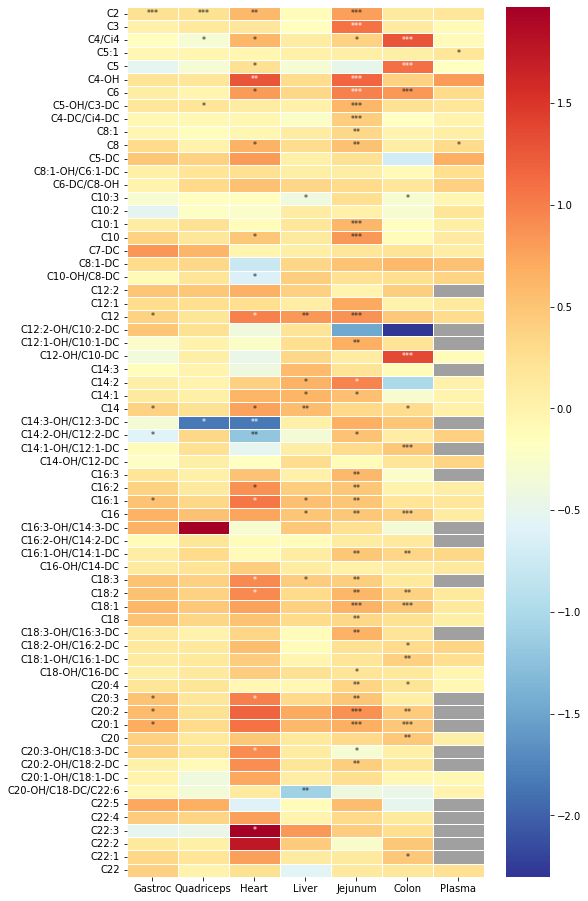

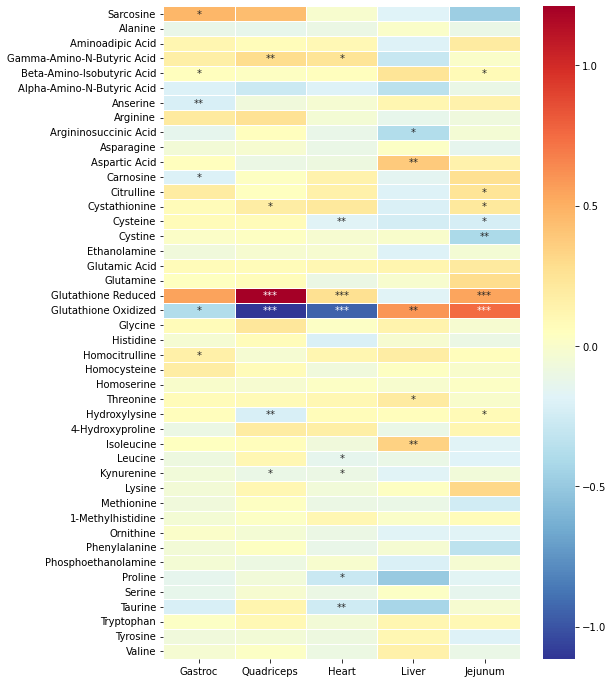

In [9]:
import os 
figures_dir = "figures"
fig = plt.figure(figsize=(8,16))
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
g = sns.heatmap(log_tissue_AC_ratio,cmap="RdYlBu_r",linewidths=.5,\
               xticklabels=log_tissue_AC_ratio.columns,\
               annot=tissue_AC_ss,fmt='',annot_kws={'va':'center','size':8})
g.set_facecolor("#A0A0A0")
plt.savefig("{0}/AC_heatmap.png".format(figures_dir),dpi=200, facecolor='w',bbox_inches="tight")

fig = plt.figure(figsize=(8,12))
g = sns.heatmap(log_tissue_amine_ratio,cmap="RdYlBu_r",linewidths=.5,\
               xticklabels=log_tissue_amine_ratio.columns,\
               annot=tissue_amine_ss,fmt='',annot_kws={'va':'center','size':10})
g.set_facecolor("#A0A0A0")
plt.savefig("{0}/amine_heatmap.png".format(figures_dir),dpi=200, facecolor='w',bbox_inches="tight")

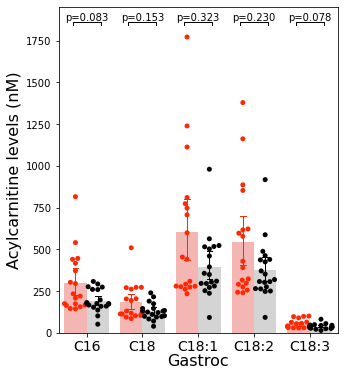

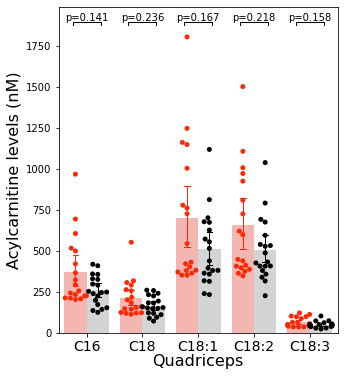

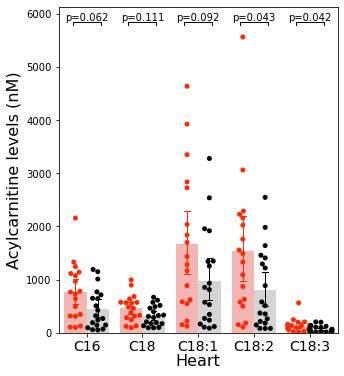

In [13]:
soybean_ACs = ["C16","C18","C18:1","C18:2","C18:3"]

tissues=["Gastroc"]
# for pval in tissue_AC_pvals.loc[soybean_ACs,tissues].squeeze().tolist():
#     print(pval)
pval_strs = ["p={:.3f}".format(pval) for pval in tissue_AC_pvals.loc[soybean_ACs,tissues].squeeze().tolist()]
multiple_analyte_barplot(tissue_AC_df,analytes=soybean_ACs,tissues=tissues,A_group_re=r'AF|AM',group_col="SampleID",
                           ax=None,units="nM",sig_strs=pval_strs,legend=False)
tissues=["Quadriceps"]
pval_strs = ["p={:.3f}".format(pval) for pval in tissue_AC_pvals.loc[soybean_ACs,tissues].squeeze().tolist()]
multiple_analyte_barplot(tissue_AC_df,analytes=soybean_ACs,tissues=tissues,A_group_re=r'AF|AM',group_col="SampleID",
                           ax=None,units="nM",sig_strs=pval_strs,legend=False)
tissues=["Heart"]
pval_strs = ["p={:.3f}".format(pval) for pval in tissue_AC_pvals.loc[soybean_ACs,tissues].squeeze().tolist()]
multiple_analyte_barplot(tissue_AC_df,analytes=soybean_ACs,tissues=tissues,A_group_re=r'AF|AM',group_col="SampleID",
                           ax=None,units="nM",sig_strs=pval_strs,legend=False)

In [14]:
#Troubleshooting cell 
# tissue_amine_ss.loc["Glutamine","Jejunum"]
# display(tissue_amine_ss.loc["Glutamine",:])
# display(tissue_amine_ss.loc[:,"Jejunum"])
# print(tissue_amine_ss.loc[:,"Jejunum"].index)
analytes = ["C5:1","C5","C4/Ci4","C3"]
tissues = ["Colon"]
tissue_BCAA_ss =tissue_AC_ss.loc[analytes,tissues]
display(tissue_BCAA_ss)
print(type(tissue_BCAA_ss))
print(tissue_BCAA_ss.squeeze().tolist())



# analytes = ["C2"]
# tissues = ["Gastroc","Quadriceps","Heart","Liver","Jejunum","Colon","Plasma"]
# tissue_C2_ss = tissue_AC_ss.loc[analytes,tissues]
# print(tissue_C2_ss.squeeze().tolist())

# print(type(tissue_C2_ss) == pd.DataFrame)

,Colon
C5:1,
C5,***
C4/Ci4,***
C3,


<class 'pandas.core.frame.DataFrame'>
['', '***', '***', '']


In [354]:
import scipy as sp
# import learn as sklearn
from sklearn.cluster import KMeans

def sort_cluster_labels(labels,centers):
    if len(centers) == 2:
        unique_sorted_labels = list(set(labels))
        unique_sorted_labels.sort()
#         original_centers_mapping = dict(zip(unique_sorted_labels,centers))
        #Determine if clusters[0] has more features > clusters[1]; if so, reverse labels and return
        if sum(centers[0]>centers[1]) > len(centers[0])/2:  
            #Inversion of cluster order 
            invert_dict = {unique_sorted_labels[0]:unique_sorted_labels[1],
                          unique_sorted_labels[1]:unique_sorted_labels[0]}
            labels_srs = pd.Series(labels)
            inv_labels = labels_srs.map(invert_dict).values
            return inv_labels
        else: 
            return labels

    #TODO: generalizable case with 3+ clusters and multiple comparisons
    #     print(np.sum(centers,axis=1))

def kmeans_cluster_ms(ms_df,analytes,tissues,force_separate_arms=True):
    sample_ids = ms_df["SampleID"].unique().tolist()
    sample_arm = [re.match(r'MG\d+_([AB])[MF]\d+',sample_id).groups()[0] for sample_id in sample_ids]
    obs_df = pd.DataFrame(index=sample_ids)
    obs_df.loc[:,"Arm"] = sample_arm
    for tissue in tissues: 
        tissue_df = ms_df.loc[ms_df["Tissue"]==tissue]
        for analyte in analytes: 
            tissue_analyte_data = tissue_df[analyte]
            col_key = "{0}_{1}".format(tissue,analyte)
            obs_df.loc[tissue_df["SampleID"],col_key] = tissue_analyte_data.tolist()
#     display(obs_df)
    analyte_cols = obs_df.columns[1:].tolist()
    if force_separate_arms:
        #Cluster A observations
        obs_A_df = obs_df.loc[obs_df["Arm"]=="A"].drop("Arm",axis=1) #A data, numeric analyte data only
        whitened_A = sp.cluster.vq.whiten(obs_A_df)
        A_km_results = KMeans(n_clusters=2,random_state=0).fit(whitened_A)
        A_cluster_labels,A_cluster_centers = A_km_results.labels_, A_km_results.cluster_centers_
        A_cluster_labels = sort_cluster_labels(A_cluster_labels,A_cluster_centers)
        
        #Cluster B observations
        obs_B_df = obs_df.loc[obs_df["Arm"]=="B"].drop("Arm",axis=1) #B data, numeric analyte data only
        whitened_B = sp.cluster.vq.whiten(obs_B_df)
        B_km_results = KMeans(n_clusters=2,random_state=0).fit(whitened_B)
        B_cluster_labels, B_cluster_centers = B_km_results.labels_, B_km_results.cluster_centers_
        B_cluster_labels = sort_cluster_labels(B_cluster_labels,B_cluster_centers)
        #TODO: QC to make sure higher centroid has higher mean cluster label
        #Offset B cluster labels, add both to obs_df 
        B_cluster_labels = B_cluster_labels + len(set(A_cluster_labels))
        obs_df.loc[obs_A_df.index,"Cluster"] = A_cluster_labels
        obs_df.loc[obs_B_df.index,"Cluster"] = B_cluster_labels
    else:
        whitened_obs = sp.cluster.vq.whiten(obs_A_df.drop("Arm",axis=1))
        km_results = KMeans(n_clusters=2,random_state=0).fit(whitened_obs)
        cluster_labels = km_results.labels_
        obs_df.loc[:,"Cluster"] = cluster_labels
    reordered_cols = ["Arm","Cluster"]
    reordered_cols.extend(analyte_cols)
    obs_df = obs_df[reordered_cols]
    obs_df.loc[:,"Cluster"] = obs_df.loc[:,"Cluster"].astype(int)
    return obs_df

soybean_4ACs = ["C16","C18","C18:1","C18:2"]
soybean_5ACs = ["C16","C18","C18:1","C18:2","C18:3"]

soybean_obs_df = kmeans_cluster_ms(tissue_AC_df,analytes=soybean_4ACs,tissues=["Gastroc","Quadriceps","Heart"])
soybean5_muscle_obs_df = kmeans_cluster_ms(tissue_AC_df,analytes=soybean_5ACs,tissues=["Gastroc","Quadriceps","Heart"])
SFA_obs_df = kmeans_cluster_ms(tissue_AC_df,analytes=SFA_ACs,tissues=["Gastroc","Quadriceps","Heart"])
UFA_obs_df = kmeans_cluster_ms(tissue_AC_df,analytes=UFA_ACs,tissues=["Gastroc","Quadriceps","Heart"])
soybean_intestines_obs_df = kmeans_cluster_ms(tissue_AC_df,analytes=soybean_5ACs,tissues=["Jejunum"])

soybean_intestines_obs_df2 = kmeans_cluster_ms(tissue_AC_df,analytes=soybean_4ACs,tissues=["Jejunum"])


cluster_columns = ["Soybean4_muscle","Soybean5_muscle","SFA_muscle","UFA_muscle","Soybean_intestines","Soybean4_intestines"]

cluster_df = pd.DataFrame(index=soybean_obs_df.index,columns=cluster_columns)
cluster_df.loc[:,"Soybean4_muscle"] = soybean_obs_df["Cluster"]
cluster_df.loc[:,"Soybean5_muscle"] = soybean5_muscle_obs_df["Cluster"]
cluster_df.loc[:,"SFA_muscle"] = SFA_obs_df["Cluster"]
cluster_df.loc[:,"UFA_muscle"] = UFA_obs_df["Cluster"]
cluster_df.loc[:,"Soybean_intestines"] = soybean_intestines_obs_df["Cluster"]
cluster_df.loc[:,"Soybean4_intestines"] = soybean_intestines_obs_df2["Cluster"]
display(cluster_df)

cluster_df.to_csv("analyte_cluster_labels.csv")

,Soybean4_muscle,Soybean5_muscle,SFA_muscle,UFA_muscle,Soybean_intestines,Soybean4_intestines
MG01_AM1,0,0,0,0,0,0
MG01_AM2,0,0,0,0,1,1
MG01_AM3,0,0,0,0,0,0
MG01_AM4,1,1,0,0,1,1
MG01_AM5,0,0,0,0,0,0
MG01_AM6,0,0,0,0,0,0
MG01_AM7,0,0,0,0,1,1
MG01_AM8,1,1,0,0,0,0
MG01_AF1,0,0,0,0,0,0
MG01_AF2,0,0,0,0,0,0


In [276]:

#Correlation analysis for soybean derived ACs between different muscles 
# HWDC_cluster_palette={"0":"#FEACA7","1":"#FF2804","2":"#D4D4D4","3":"#000000"} #0,2 lighter
HWDC_cluster_palette={0:"#FEACA7",1:"#FF2804",2:"#AAAAAA",3:"#000000"} #1,2 lighter (for unfixed cluster labels)
HWDC_reds_cluster_palette = {0:"#FEACA7",1:"#FF2804"}
HWDC_blacks_cluster_palette = {2:"#AAAAAA",3:"#000000"}

def analyte_long_df(ms_df,analytes,tissue1,tissue2,obs_df=pd.DataFrame(),axes_analyte_map=None,zscore=False):
    """
    Generate long form DataFrame of Mass Spec data for tissue1, tissue2 for analytes. 
    @param ms_df: 
    @param analytes: 
    @param tissue1:
    @param tissue2:
    @param obs_df: 
    @param axes_analyte_map: Dictionary mapping analyte strings to 
    @return long_df: Long form DataFrame with index and columns specified as below. 
    Index is mouseID_analyte for each analyte in analytes; columns are Tissue1 and Tissue2 analyte values, Analyte,
    and Analyte_Axes (populated from axes_analyte_map), which allows specific analytes to be grouped together for 
    axes scaling.  
    """
    tissue1_df = ms_df.loc[ms_df["Tissue"]==tissue1]
    tissue2_df = ms_df.loc[ms_df["Tissue"]==tissue2]
    sample_ids = tissue1_df["SampleID"]
    sample_arm = [re.match(r'MG\d+_([AB])[MF]\d+',sample_id).groups()[0] for sample_id in sample_ids]
    tissue1_analytes = tissue1_df.loc[:,analytes]
    tissue2_analytes = tissue2_df.loc[:,analytes]
    
    #Initialize long_df; include Cluster and Analyte_Arm columns if obs_df is provided 
    long_columns = [tissue1,tissue2,"Analyte","Arm","MouseID","Analyte_Axes"]
    obs_columns = ["Cluster","Analyte_Arm"]
    if len(obs_df)>0: 
        long_columns.extend(obs_columns)    
    long_df = pd.DataFrame(columns=long_columns)
    
    for analyte in analytes:
        analyte_index = pd.Index(["{0}_{1}".format(sampleid, analyte) for sampleid in sample_ids])
        analyte_long_df = pd.DataFrame(index=analyte_index,columns=long_columns)
        t1_analyte = tissue1_analytes[analyte]
        t2_analyte = tissue2_analytes[analyte]
        if zscore: 
            analyte_long_df.loc[analyte_index,tissue1] = sp_stats.zscore(t1_analyte.tolist())
            analyte_long_df.loc[analyte_index,tissue2] = sp_stats.zscore(t2_analyte.tolist())
        else:
            analyte_long_df.loc[analyte_index,tissue1] = t1_analyte.tolist()
            analyte_long_df.loc[analyte_index,tissue2] = t2_analyte.tolist()
        analyte_long_df.loc[analyte_index,"Analyte"] = [analyte]*len(analyte_long_df)
        analyte_long_df.loc[analyte_index,"Arm"] = sample_arm 
        analyte_long_df.loc[analyte_index,"MouseID"] = sample_ids.tolist()
        analyte_long_df.loc[analyte_index,"Analyte_Arm"] = ["{0}_{1}".format(analyte,arm) for arm in sample_arm]
        if len(obs_df)>0:
            analyte_long_df.loc[analyte_index,"Cluster"] = obs_df["Cluster"].tolist()
            
        if axes_analyte_map:
            analyte_long_df.loc[analyte_index,"Analyte_Axes"] = \
            analyte_long_df.loc[analyte_index,"Analyte"].map(axes_analyte_map).astype(int)
        else: 
            analyte_long_df.loc[analyte_index,"Analyte_Axes"] = [0] * len(analyte_index)
            
        long_df = pd.concat([long_df,analyte_long_df])
    return long_df

def SCC_plot(ms_df,analytes,tissue1="Gastroc",tissue2="Quadriceps",correlation="Spearman",title_analytes_label="",ax=None):
        
    long_df = analyte_long_df(ms_df,analytes=analytes,tissue1=tissue1,tissue2=tissue2)
    if not ax: 
        fig,ax = plt.subplots(1,1,figsize=(6,6))
    scc_r, scc_p = sp.stats.spearmanr(a=long_df, axis=0, nan_policy='propagate', alternative='two-sided')
    pcc_r, pcc_p = sp.stats.pearsonr(x=long_df[tissue1],y=long_df[tissue2])
    sns.scatterplot(data=long_df,x=tissue1,y=tissue2,ax=ax)
    
    scc_str = "Spearman R: {:.3f}".format(scc_r,scc_p)
    pcc_str = "Pearson R: {:.3f}".format(pcc_r,pcc_p)
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    xdiff, ydiff = xmax-xmin, ymax-ymin
    ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.05,s=scc_str,fontsize=10)
    ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.1,s=pcc_str,fontsize=10)
    title_str = "{0} vs {1} for {2}".format(tissue1,tissue2,title_analytes_label)
    ax.set_title(title_str,fontsize=14)
    
def SCC_plot_cluster_hue(ms_df,analytes,obs_df,tissue1="Gastroc",tissue2="Quadriceps",title_analytes_label="",
                         ax=None,hue_type="cluster",axes_analyte_map=None):
    """
    """
    long_df = analyte_long_df(ms_df,analytes=analytes,tissue1=tissue1,tissue2=tissue2,
                              obs_df=obs_df,axes_analyte_map=axes_analyte_map)
    
    scc_r, scc_p = sp.stats.spearmanr(a=long_df[[tissue1,tissue2]], axis=0, nan_policy='propagate', alternative='two-sided')
    pcc_r, pcc_p = sp.stats.pearsonr(x=long_df[tissue1],y=long_df[tissue2])
    display(long_df)
    
    if hue_type == "cluster":
        if not ax: 
            fig,ax = plt.subplots(1,1,figsize=(6,6))
            fig.tight_layout(pad=3)
            axes = [ax]
        sns.scatterplot(data=long_df,x=tissue1,y=tissue2,ax=ax,hue="Cluster",palette=HWDC_cluster_palette,alpha=0.8)
        title_str = "{0} vs {1} for {2}, clustered by analyte level".format(tissue1,tissue2,title_analytes_label)
        ax.set_title(title_str,fontsize=14)
    elif hue_type == "analyte":
        if not ax: 
            fig,ax = plt.subplots(1,1,figsize=(6,6))
            fig.tight_layout(pad=3)
            axes = [ax]
        sns.scatterplot(data=long_df,x=tissue1,y=tissue2,ax=ax,hue="Analyte_Arm",
                        palette=sns.color_palette("Paired")[:len(analytes)*2],alpha=0.8)
        title_str = "{0} vs {1} for {2}, colored by analyte level".format(tissue1,tissue2,title_analytes_label)
        ax.set_title(title_str,fontsize=14)
        
    elif hue_type == "both":
        fig,axes = plt.subplots(1,2,figsize=(14,7))
        
        ax1, ax2 = axes 
        new_labels = ["A Cluster 1","A Cluster 2","B cluster 1","B cluster 2"] #Needs reordering
        if not axes_analyte_map:
            fig.tight_layout(pad=3)
            sns.scatterplot(data=long_df,x=tissue1,y=tissue2,ax=ax1,hue="Cluster",palette=HWDC_cluster_palette,alpha=0.8)
            sns.scatterplot(data=long_df,x=tissue1,y=tissue2,ax=ax2,hue="Analyte_Arm",
                            palette=sns.color_palette("Paired")[:len(analytes)*2][::-1],alpha=0.8)
            handles, labels = [],[]
            collect_legends=False
            if collect_legends:
                for ax in axes: 
                    handles_, labels_ = ax.get_legend_handles_labels()
                    if ax == ax1:
                        labels_ = new_labels
                    handles.extend(handles_)
                    labels.extend(labels_)
                    ax.get_legend().remove()
                ax.legend(handles, labels, loc='upper left')
                sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
            else: #Stagger legends - can adjust positioning in bbox_to_anchor flags; 
                handles, labels_ = ax1.get_legend_handles_labels()
                ax1.legend(handles,new_labels,title="Cluster")
                sns.move_legend(ax1, "upper left", bbox_to_anchor=(2.15, 1)) #left axes legend
                sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 0.72)) #right axes legend
        else: 
            fig.tight_layout(pad=8)
            analyte_palette = sns.color_palette("Paired")[:len(analytes)][::-1]
            palette_index = 0
            for i,ax_cluster in enumerate(set(axes_analyte_map.values())):
                ax_data = long_df.loc[long_df["Analyte_Axes"] == ax_cluster,:]
                n_analytes = len(ax_data["Analyte"].unique())
                analytes_str = ", ".join(ax_data["Analyte"].unique())
                if i == 0: 
                    sns.scatterplot(data=ax_data,x=tissue1,y=tissue2,ax=ax1,hue="Cluster",palette=HWDC_cluster_palette,alpha=0.8)
                    sns.scatterplot(data=ax_data,x=tissue1,y=tissue2,ax=ax2,hue="Analyte",
                            palette=analyte_palette[:n_analytes],alpha=0.8)
                    for ax in axes:
                        ax.set_xlabel("{0} ({1})".format(tissue1,analytes_str),fontsize=12)
                        ax.set_ylabel("{0} ({1})".format(tissue2,analytes_str),fontsize=12)
                else:
                    ax1_twinx, ax2_twinx = ax1.twinx(), ax2.twinx()
                    ax1_twin, ax2_twin = ax1_twinx.twiny(),ax2_twinx.twiny()
                    sns.scatterplot(data=ax_data,x=tissue1,y=tissue2,ax=ax1_twin,hue="Cluster",palette=HWDC_cluster_palette,alpha=0.8)
                    sns.scatterplot(data=ax_data,x=tissue1,y=tissue2,ax=ax2_twin,hue="Analyte",
                            palette=analyte_palette[palette_index:palette_index+n_analytes],alpha=0.8)
                    for ax in [ax1_twin,ax2_twin]:
                        ax.set_xlabel("{0} ({1})".format(tissue1,analytes_str),fontsize=12)
                    for ax in [ax1_twinx,ax2_twinx]:
                        ax.set_ylabel("{0} ({1})".format(tissue2,analytes_str),fontsize=12)
                    ax1_twin.get_legend().remove()
                palette_index += n_analytes
            handles, labels_ = ax1.get_legend_handles_labels()    
            ax1.legend(handles,new_labels,title="Cluster")
            sns.move_legend(ax1, "upper left", bbox_to_anchor=(2.5, 1))
            
            ax2_handles, ax2_labels = [], [] 
            for ax in [ax2,ax2_twin]:
                handles_, labels_ = ax.get_legend_handles_labels()
                ax2_handles.extend(handles_)
                ax2_labels.extend(labels_)
                ax.get_legend().remove()
            ax2.legend(ax2_handles,ax2_labels,title="Analyte")
            sns.move_legend(ax2, "upper left", bbox_to_anchor=(1.18, 0.72))
            
        title_str = "{0} vs {1}\n{2}\nClustered by Analyte Level within Arm".format(tissue1,tissue2,title_analytes_label)
        ax1.set_title(title_str,fontsize=14)
        title_str = "{0} vs {1}\n{2}\nColored by Analyte and Arm".format(tissue1,tissue2,title_analytes_label)
        ax2.set_title(title_str,fontsize=14)
        
        
    scc_str = "Spearman R: {:.3f}".format(scc_r,scc_p)
    pcc_str = "Pearson R: {:.3f}".format(pcc_r,pcc_p)
    for ax in axes:
        xmin,xmax = ax.get_xlim()
        ymin,ymax = ax.get_ylim()
        xdiff, ydiff = xmax-xmin, ymax-ymin
        ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.05,s=scc_str,fontsize=10)
        ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.1,s=pcc_str,fontsize=10)
    return fig 

    
    
        

,Gastroc,Quadriceps,Analyte,Arm,MouseID,Analyte_Axes,Cluster,Analyte_Arm
MG01_AM1_C16,207.675,207.04,C16,A,MG01_AM1,0,0,C16_A
MG01_AM2_C16,166.394,233.291,C16,A,MG01_AM2,0,0,C16_A
MG01_AM3_C16,174.651,225.246,C16,A,MG01_AM3,0,0,C16_A
MG01_AM4_C16,371.529,605.243,C16,A,MG01_AM4,0,1,C16_A
MG01_AM5_C16,143.743,211.486,C16,A,MG01_AM5,0,0,C16_A
...,...,...,...,...,...,...,...,...
MG01_BF6_C18:2,370.742,527.562,C18:2,B,MG01_BF6,1,3,C18:2_B
MG01_BF7_C18:2,488.195,790.585,C18:2,B,MG01_BF7,1,3,C18:2_B
MG01_BF8_C18:2,462.671,538.593,C18:2,B,MG01_BF8,1,3,C18:2_B
MG01_BF9_C18:2,351.924,594.183,C18:2,B,MG01_BF9,1,2,C18:2_B


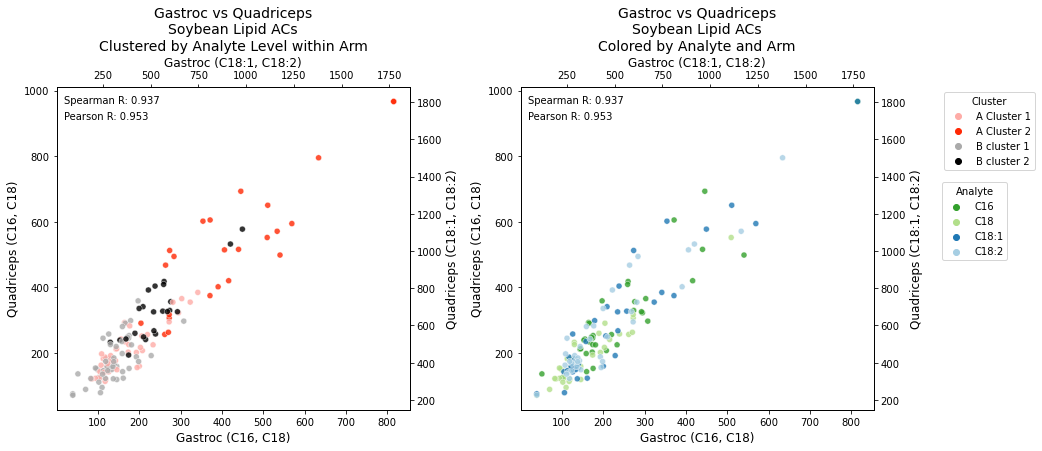

In [337]:
figures_dir = "figures/analyte_scatter"
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

soybean_SFA_ACs = ["C16","C18"]
soybean_UFA_ACs = ["C18:1","C18:2"]
# SCC_plot_cluster_hue(tissue_AC_df,soybean_SFA_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Quadriceps",title_analytes_label="Soybean Saturated Lipid ACs",hue_type="both")

# SCC_plot_cluster_hue(tissue_AC_df,soybean_UFA_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Quadriceps",title_analytes_label="Soybean Unsaturated Lipid ACs",hue_type="both")

soybean_4ACs = ["C16","C18","C18:1","C18:2"]
analyte_ax_map = {"C16":0,"C18":0,"C18:1":1,"C18:2":1}
analyte_ax_map_5AC = {"C16":0,"C18":0,"C18:1":1,"C18:2":1,"C18:3":1}
fig = SCC_plot_cluster_hue(tissue_AC_df,soybean_4ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
                     tissue2="Quadriceps",title_analytes_label="Soybean Lipid ACs",hue_type="both",
                    axes_analyte_map=analyte_ax_map)
plt.savefig("{0}/soybeanAC_clusters,analyte.png".format(figures_dir),dpi=300,bbox_inches="tight",facecolor="w")

# plt.savefig("{0}/soybeanAC_clusters,analyte.png".format(figures_dir),dpi=300,bbox_inches="tight",facecolor="w")


# SCC_plot_cluster_hue(tissue_AC_df,soybean_SFA_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Quadriceps",title_analytes_label="Soybean lipid ACs",hue_type="cluster")

In [352]:
def sync_parasite_axes(twin_ax1,twin_ax2, force_zero=True):
    """Helper function to synchronize axes limits for two parasite axes
    @param twin_ax1: twin axes 1 
    @param twin_ax2: twin axes 2 
    """
    #Get ax limits for twin_ax1 and twin_ax2 

    twin_xmin1, twin_xmax1 = twin_ax1.get_xlim()
    twin_ymin1, twin_ymax1 = twin_ax1.get_ylim()
    twin_xmin2, twin_xmax2 = twin_ax2.get_xlim()
    twin_ymin2, twin_ymax2 = twin_ax2.get_ylim()
    if twin_xmax1 > twin_xmax2: 
        set_xmin = twin_xmin1
        set_xmax = twin_xmax1
    else: 
        set_xmin = twin_xmin2
        set_xmax = twin_xmax2
    if twin_ymax1 > twin_ymax2: 
        set_ymin = twin_ymin1
        set_ymax = twin_ymax1
    else: 
        set_ymin = twin_ymin2
        set_ymax = twin_ymax2
    # Force axes min to 0 if force_zero
    if force_zero: 
        set_xmin, set_ymin = 0, 0
    #Sync lims 
    twin_ax1.set_xlim(set_xmin,set_xmax)
    twin_ax2.set_xlim(set_xmin,set_xmax)
    twin_ax1.set_ylim(set_ymin,set_ymax)
    twin_ax2.set_ylim(set_ymin,set_ymax)
    
def SCC_PCC_annotation(long_df,ax,hue_type,tissue1,tissue2,dual_axes=False): 
    """Calculate Spearman and Pearson correlation coefficients, annotate them onto ax in upper left. 
    """
    #Calculate SCC, PCC; string formatting into text 
    scc_r, scc_p = sp.stats.spearmanr(a=long_df[[tissue1,tissue2]], axis=0, nan_policy='propagate', alternative='two-sided')
    pcc_r, pcc_p = sp.stats.pearsonr(x=long_df[tissue1],y=long_df[tissue2])
    scc_str, pcc_str = "Spearman R: {:.3f}".format(scc_r),"Pearson R: {:.3f}".format(pcc_r)
    #Text annotation onto ax 
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    xdiff, ydiff = xmax-xmin, ymax-ymin
    ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.05,s=scc_str,fontsize=10)
    ax.text(x=xmin+xdiff*.02,y=ymax-ydiff*.1,s=pcc_str,fontsize=10)
    #Use hue_type to choose legend positioning 
    if dual_axes:
        if hue_type == "cluster":
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1,1))
        elif hue_type == "cluster_mouse":
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1.12,1))
    else:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

def MS_cluster_scatter(data,tissue1,tissue2,ax,arm,hue_type="cluster"):
#     xticks, xlabels = ax.get_xticks()
#     yticks, ylabels = ax.get_yticks()
#     ax.set_xticks(xticks,xlabels,weight="bold")
#     ax.set_yticks(yticks,ylabels,weight="bold")
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontweight('bold') for label in labels]
    if hue_type == "cluster": 
        sns.scatterplot(data=data,x=tissue1,y=tissue2,ax=ax,hue="Cluster",palette=HWDC_cluster_palette,alpha=0.95)
    elif hue_type == "cluster_mouse":
        #Analyte plotting split by mouse_ID
        high_cluster_label, low_cluster_label = max(data["Cluster"].unique()),min(data["Cluster"].unique())
        data_high,data_low = data.loc[data["Cluster"]==high_cluster_label],data.loc[data["Cluster"]==low_cluster_label]
        n_high, n_low = len(data_high["MouseID"].unique()),len(data_low["MouseID"].unique())
        if arm == "A":
            #Red based palettes for A animals
            high_palette = sns.color_palette("light:#D63F0E_r",n_colors=n_high+2)[:n_high] #drop last colors (too light/dark)
            low_palette = sns.color_palette("dark:#FA8BC0_r",n_colors=n_low+2)[:n_low]
        else: 
            #Blue based palettes for B animals 
            high_palette = sns.color_palette("light:#1A74FA_r",n_colors=n_high+2)[:n_high] #drop last colors (too light/dark)
            low_palette = sns.color_palette("dark:#77F8FA_r",n_colors=n_low+2)[:n_low]
        sns.scatterplot(data=data_high,x=tissue1,y=tissue2,ax=ax,hue="MouseID",palette=high_palette,alpha=0.95)
        sns.scatterplot(data=data_low,x=tissue1,y=tissue2,ax=ax,hue="MouseID",palette=low_palette,alpha=0.95)
    
def arms_split_clusters_plot(long_df,analytes,tissue1,tissue2,ax1,ax2,hue_type="cluster",axes_analyte_map=None,zscore=False):
    """Wrapper function which plots data from Arm A and Arm B onto ax1 and ax2 respectively. 
    """
    #Generate twin axes if not plotting z_scores and using axes_analyte_map
    long_df_A, long_df_B = long_df.loc[long_df["Arm"]=="A"], long_df.loc[long_df["Arm"]=="B"] #Separate by arm 
    if not zscore and axes_analyte_map:
        ax1_twinx, ax2_twinx = ax1.twinx(), ax2.twinx()
        ax1_twin, ax2_twin = ax1_twinx.twiny(),ax2_twinx.twiny()
        #Scatter plot spaghetti code 
        for i,ax_cluster in enumerate(set(axes_analyte_map.values())):
            ax_data = long_df.loc[long_df["Analyte_Axes"] == ax_cluster,:]
            ax_data_A, ax_data_B = ax_data.loc[ax_data["Arm"]=="A"],ax_data.loc[ax_data["Arm"]=="B"]
            analytes_str = ", ".join(ax_data["Analyte"].unique())
            if i == 0 or zscore: 
                plot_ax1,plot_ax2 = [ax1,ax2]
                xlabel_ax1, xlabel_ax2 = [ax1,ax2]
                ylabel_ax1, ylabel_ax2 = [ax1,ax2]
            else:
                plot_ax1,plot_ax2 = [ax1_twin,ax2_twin]
                xlabel_ax1, xlabel_ax2 = [ax1_twin,ax2_twin]
                ylabel_ax1, ylabel_ax2 = [ax1_twinx,ax2_twinx]
            #Axis labeling
            xlabel_ax1.set_xlabel("{0} ({1})".format(tissue1,analytes_str),fontsize=12,fontweight="bold")
            ylabel_ax1.set_ylabel("{0} ({1})".format(tissue2,analytes_str),fontsize=12,fontweight="bold")
            xlabel_ax2.set_xlabel("{0} ({1})".format(tissue1,analytes_str),fontsize=12,fontweight="bold")
            ylabel_ax2.set_ylabel("{0} ({1})".format(tissue2,analytes_str),fontsize=12,fontweight="bold")
            
            MS_cluster_scatter(ax_data_A,tissue1,tissue2,plot_ax1,arm="A",hue_type=hue_type)
            MS_cluster_scatter(ax_data_B,tissue1,tissue2,plot_ax2,arm="B",hue_type=hue_type)
        ax1_twin.get_legend().remove()
        ax2_twin.get_legend().remove()
        sync_parasite_axes(ax1_twin,ax2_twin,force_zero=not(zscore))
    else: 
        MS_cluster_scatter(long_df_A,tissue1,tissue2,ax1,arm="A",hue_type=hue_type)
        MS_cluster_scatter(long_df_B,tissue1,tissue2,ax2,arm="B",hue_type=hue_type)
        analytes_str = ", ".join(analytes)
        for ax in [ax1,ax2]:
            ax.set_xlabel("{0} Analyte Z-Score ({1})".format(tissue1,analytes_str),fontweight="bold")
            ax.set_ylabel("{0} Analyte Z-Score ({1})".format(tissue2,analytes_str),fontweight="bold")
    
    
def SCC_plot_arms_clusters(ms_df,analytes,obs_df,tissue1="Gastroc",tissue2="Quadriceps",title_analytes_label="",
                         ax=None,hue_type="cluster",axes_analyte_map=None,zscore=False):
    """
    """
    long_df = analyte_long_df(ms_df,analytes=analytes,tissue1=tissue1,tissue2=tissue2,
                              obs_df=obs_df,axes_analyte_map=axes_analyte_map,zscore=zscore)
    long_df_A, long_df_B = long_df.loc[long_df["Arm"]=="A"], long_df.loc[long_df["Arm"]=="B"] #Separate by arm 
#     display(long_df)
    #Cluster - two subplots, one per arm; overlay different axes according to axes_analyte_map
    if hue_type == "cluster" or hue_type == "cluster_mouse":
        if not ax: 
            if hue_type == "cluster":
                fig,axes = plt.subplots(2,1,figsize=(7,13),sharex=True,sharey=True)
                fig.tight_layout(pad=8)
                ax1,ax2 = axes
            elif hue_type == "cluster_mouse":
                fig,axes = plt.subplots(2,2,figsize=(18,18),sharex=True,sharey=True)
                if not zscore:
                    fig.tight_layout(pad=16)
                else: 
                    fig.tight_layout(pad=12)
                ax1,ax2 = axes[0,0],axes[1,0]
        arms_split_clusters_plot(long_df,analytes,tissue1,tissue2,ax1,ax2,hue_type="cluster",
                                     axes_analyte_map=axes_analyte_map,zscore=zscore)
        
        #Title and legend handling for both arms
        title_str = "{0} vs {1} for {2},\nPrevotella animals clustered by muscle soybean AC levels".format(tissue1,tissue2,title_analytes_label)
        ax1.set_title(title_str,fontsize=14,fontweight="bold") 
        handles, labels_ = ax1.get_legend_handles_labels()
        new_cluster_A_labels = ["Prevotella Low\nAC Cluster", "Prevotella High\nAC Cluster"]
        ax1.legend(handles,new_cluster_A_labels,title="Cluster")

        title_str = "{0} vs {1} for {2},\nNon-Prevotella animals clustered by muscle soybean AC levels".format(tissue1,tissue2,title_analytes_label)
        ax2.set_title(title_str,fontsize=14,fontweight="bold")
        handles, labels_ = ax2.get_legend_handles_labels()
        new_cluster_B_labels = ["Non-Prevotella\nLow AC Cluster", "Non-Prevotella\nHigh AC Cluster"]
        ax2.legend(handles,new_cluster_B_labels,title="Cluster")
        
        for ax,long_df_arm in zip([ax1,ax2],[long_df_A,long_df_B]):
            SCC_PCC_annotation(long_df_arm,ax,hue_type,tissue1,tissue2,dual_axes=not(zscore))
            
        ### moving onto right axes - by mouse###
            
        if hue_type == "cluster_mouse": #Fill in remaining two plots with hue by mice 
            #Axes specifying in 2x2 subplots set up 
            ax1,ax2 = axes[0,1],axes[1,1]
            arms_split_clusters_plot(long_df,analytes,tissue1,tissue2,ax1,ax2,hue_type=hue_type,
                                     axes_analyte_map=axes_analyte_map,zscore=zscore)
            #Title str formatting 
            title_str = "{0} vs {1} for {2},\nPrevotella animals, colored by mouse".format(tissue1,tissue2,title_analytes_label)
            ax1.set_title(title_str,fontsize=14,fontweight="bold") 
            title_str = "{0} vs {1} for {2},\nNon-Prevotella animals, colored by mouse".format(tissue1,tissue2,title_analytes_label)
            ax2.set_title(title_str,fontsize=14,fontweight="bold")
            
            
            for ax,long_df_arm in zip([ax1,ax2],[long_df_A,long_df_B]):
                SCC_PCC_annotation(long_df_arm,ax,hue_type,tissue1,tissue2,dual_axes=not(zscore))    

        
    return fig 

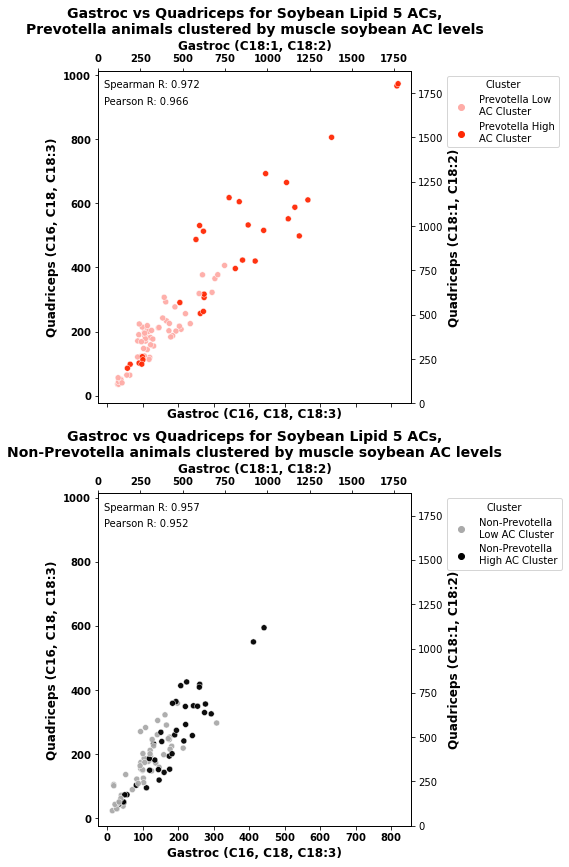

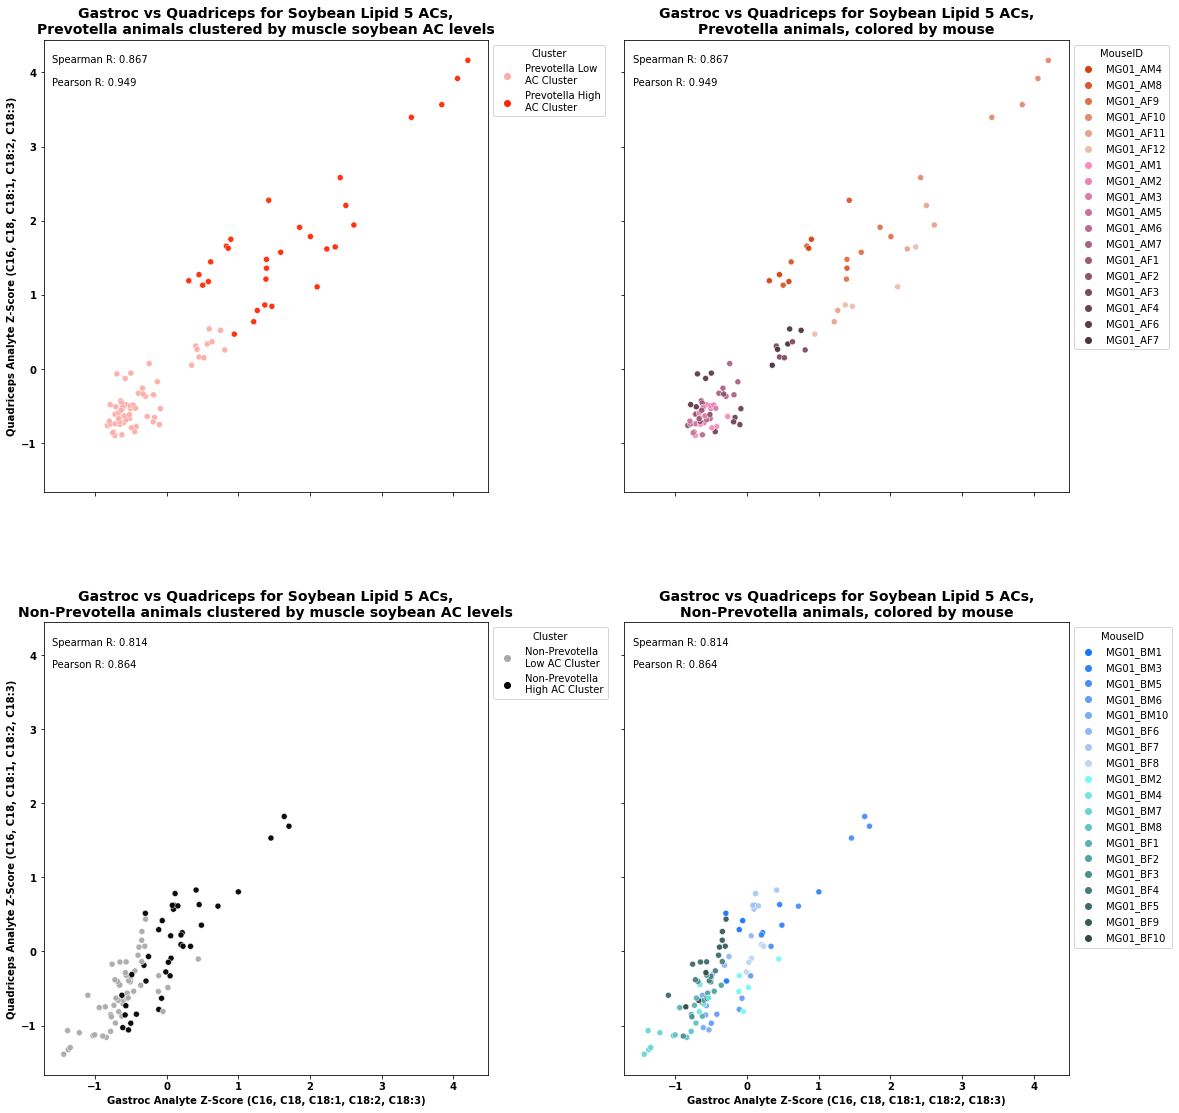

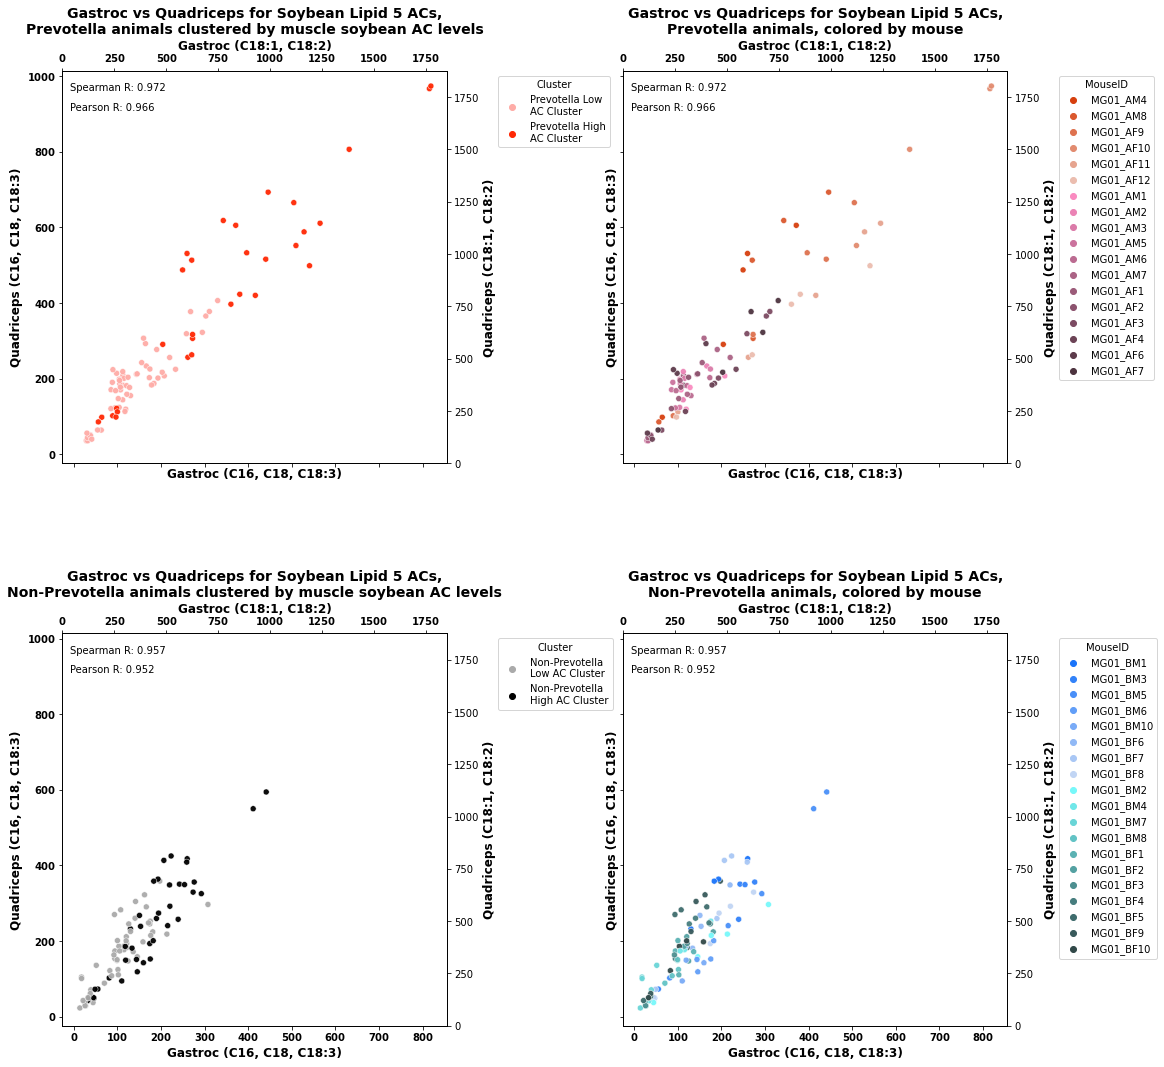

In [353]:
analyte_ax_map = {"C16":0,"C18":0,"C18:1":1,"C18:2":1}
analyte_ax_map_5AC = {"C16":0,"C18":0,"C18:1":1,"C18:2":1,"C18:3":0}
#Gastroc Quadriceps plots 
tissue_tag = "GQ"
clusters_path = "{0}/cluster/{1}".format(figures_dir,tissue_tag)
if not os.path.exists(clusters_path):
    os.makedirs(clusters_path)

overwrite = True
if not os.path.exists("{0}/soybean5AC_clusters_2panel.png".format(clusters_path)) or overwrite: 
    fig = SCC_plot_arms_clusters(tissue_AC_df,soybean_5ACs,obs_df=soybean5_muscle_obs_df,tissue1="Gastroc",
                         tissue2="Quadriceps",title_analytes_label="Soybean Lipid 5 ACs",hue_type="cluster",
                        axes_analyte_map=analyte_ax_map_5AC)
    plt.savefig("{0}/soybeanAC_clusters_2panel_{1}.png".format(clusters_path,tissue_tag),
                dpi=300,bbox_inches="tight",facecolor="w")

mouseID_4panel_fpath = "{0}/soybean5AC_4panel_mouseID_zscore_{1}.png".format(clusters_path,tissue_tag)    
if not os.path.exists(mouseID_4panel_fpath) or overwrite: 
    fig_mouse = SCC_plot_arms_clusters(tissue_AC_df,soybean_5ACs,obs_df=soybean5_muscle_obs_df,tissue1="Gastroc",
                     tissue2="Quadriceps",title_analytes_label="Soybean Lipid 5 ACs",hue_type="cluster_mouse",
                    axes_analyte_map=analyte_ax_map_5AC,zscore=True)
    plt.savefig(mouseID_4panel_fpath,dpi=300,bbox_inches="tight",facecolor="w")

mouseID_4panel_fpath = "{0}/soybean5AC_4panel_mouseID_{1}.png".format(clusters_path,tissue_tag)    
if not os.path.exists(mouseID_4panel_fpath) or overwrite: 
    fig_mouse = SCC_plot_arms_clusters(tissue_AC_df,soybean_5ACs,obs_df=soybean5_muscle_obs_df,tissue1="Gastroc",
                     tissue2="Quadriceps",title_analytes_label="Soybean Lipid 5 ACs",hue_type="cluster_mouse",
                    axes_analyte_map=analyte_ax_map_5AC,zscore=False)
    plt.savefig(mouseID_4panel_fpath,dpi=300,bbox_inches="tight",facecolor="w")
    
    

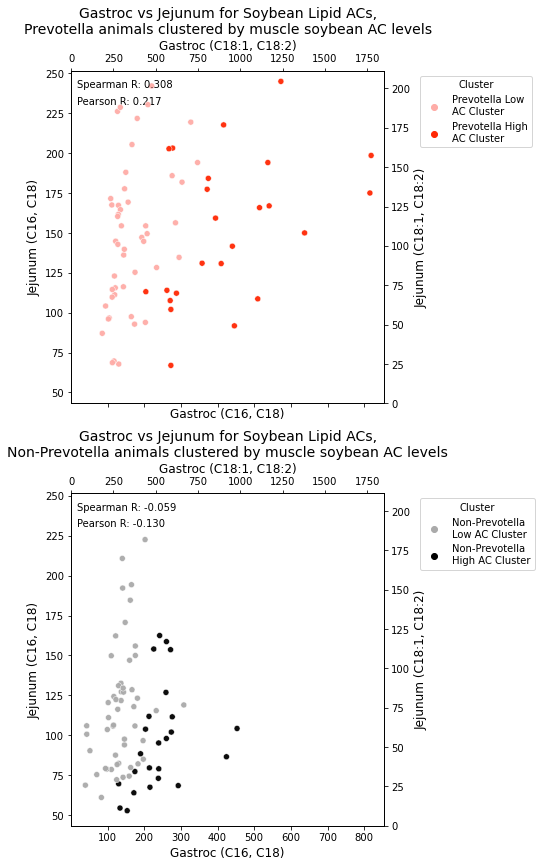

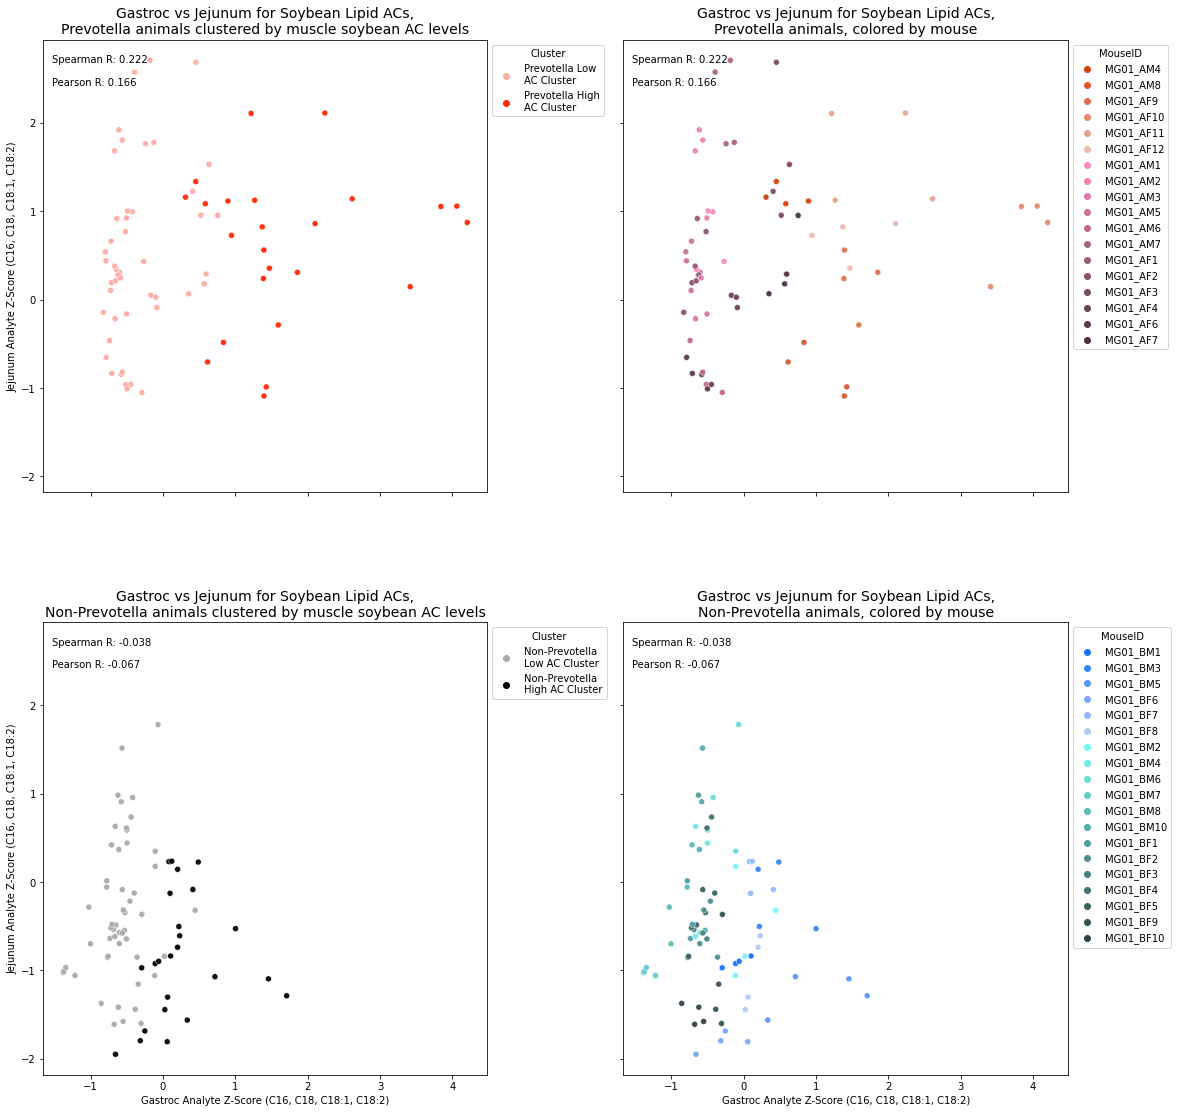

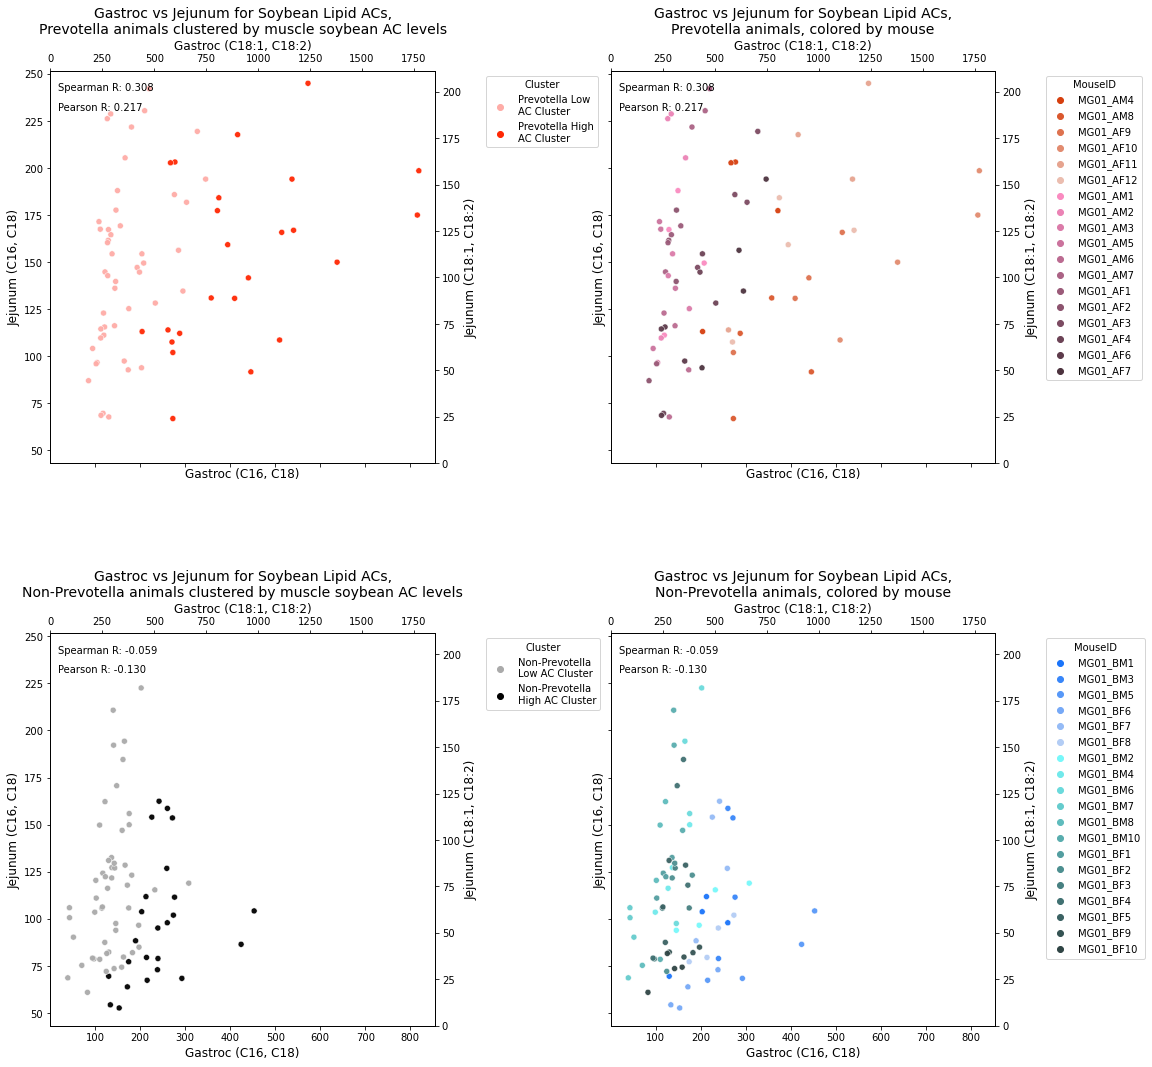

In [335]:
#Gastroc Quadriceps plots 
tissue_tag = "GJ"
clusters_path = "{0}/cluster/{1}".format(figures_dir,tissue_tag)
if not os.path.exists(clusters_path):
    os.makedirs(clusters_path)

overwrite = True
arm_2panel_fpath = "{0}/soybeanAC_clusters_2panel_{1}.png".format(clusters_path,tissue_tag)
if not os.path.exists(arm_2panel_fpath) or overwrite: 
    fig = SCC_plot_arms_clusters(tissue_AC_df,soybean_4ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
                         tissue2="Jejunum",title_analytes_label="Soybean Lipid ACs",hue_type="cluster",
                        axes_analyte_map=analyte_ax_map)
    plt.savefig(arm_2panel_fpath,dpi=300,bbox_inches="tight",facecolor="w")

mouseID_4panel_fpath = "{0}/soybeanAC_4panel_mouseID_zscore_{1}.png".format(clusters_path,tissue_tag)    
if not os.path.exists(mouseID_4panel_fpath) or overwrite: 
    fig_mouse = SCC_plot_arms_clusters(tissue_AC_df,soybean_4ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
                     tissue2="Jejunum",title_analytes_label="Soybean Lipid ACs",hue_type="cluster_mouse",
                    axes_analyte_map=analyte_ax_map,zscore=True)
    plt.savefig(mouseID_4panel_fpath,dpi=300,bbox_inches="tight",facecolor="w")

mouseID_4panel_fpath = "{0}/soybeanAC_4panel_mouseID_{1}.png".format(clusters_path,tissue_tag)    
if not os.path.exists(mouseID_4panel_fpath) or overwrite: 
    fig_mouse = SCC_plot_arms_clusters(tissue_AC_df,soybean_4ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
                     tissue2="Jejunum",title_analytes_label="Soybean Lipid ACs",hue_type="cluster_mouse",
                    axes_analyte_map=analyte_ax_map,zscore=False)
    plt.savefig(mouseID_4panel_fpath,dpi=300,bbox_inches="tight",facecolor="w")
    
    

In [273]:
# SCC_plot_cluster_hue(tissue_AC_df,soybean_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Quadriceps",title_analytes_label="Soybean lipid ACs",hue_type="cluster")
# SCC_plot_cluster_hue(tissue_AC_df,soybean_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Quadriceps",title_analytes_label="Soybean lipid ACs",hue_type="analyte")

# SCC_plot_cluster_hue(tissue_AC_df,soybean_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Heart",title_analytes_label="Soybean lipid ACs",hue_type="cluster")
# SCC_plot_cluster_hue(tissue_AC_df,soybean_ACs,obs_df=soybean_obs_df,tissue1="Gastroc",
#                      tissue2="Heart",title_analytes_label="Soybean lipid ACs",hue_type="analyte")
    
# SCC_plot(tissue_AC_df,soybean_ACs,tissue1="Gastroc",tissue2="Quadriceps",title_analytes_label="Soybean lipid ACs")
# SCC_plot(tissue_AC_df,SFA_ACs,tissue1="Gastroc",tissue2="Quadriceps",title_analytes_label="Saturated ACs")
# SCC_plot(tissue_AC_df,UFA_ACs,tissue1="Gastroc",tissue2="Quadriceps",title_analytes_label="Unsaturated ACs")
# SCC_plot(tissue_AC_df,soybean_ACs,tissue1="Gastroc",tissue2="Heart",title_analytes_label="Soybean lipid ACs")